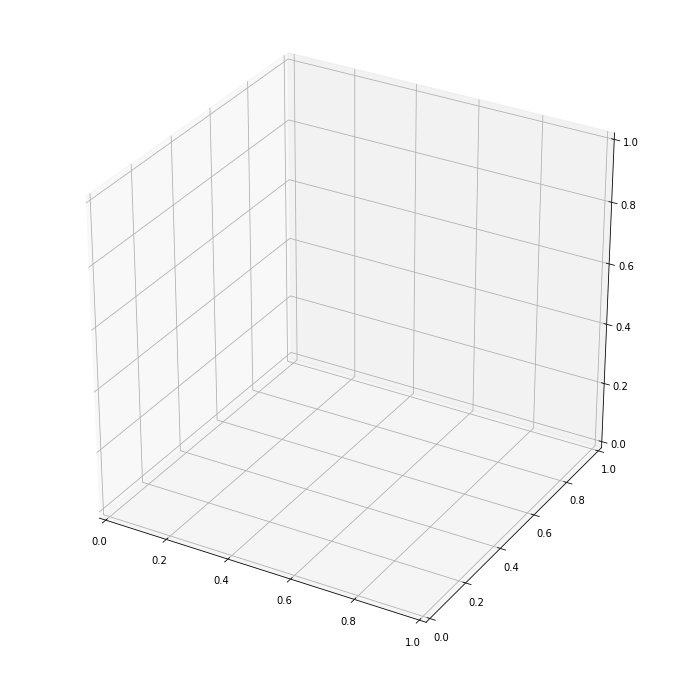

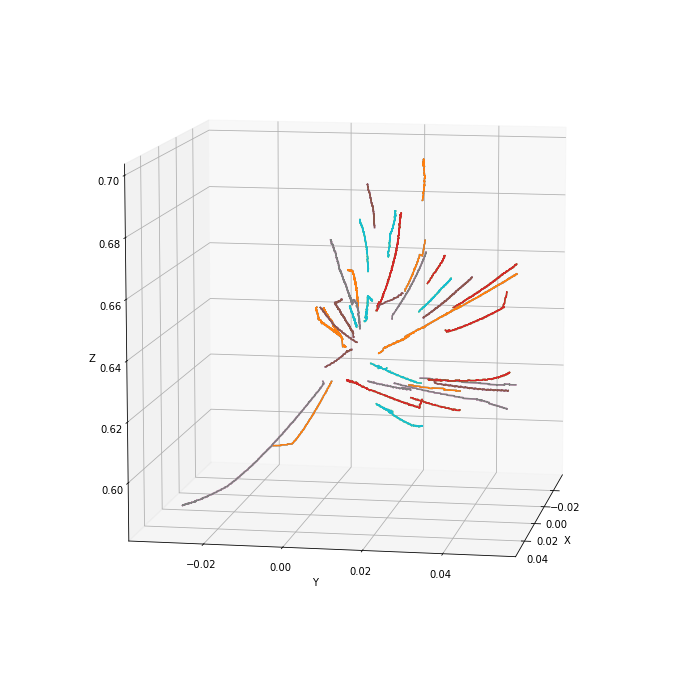

In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy import stats  
from matplotlib import cm
import math
from scipy.misc import imsave
from scipy.misc import imread
import re
import glob, os
shot = 119
picL = 18333
picR = 18158
v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))

Freq = 100.*1000.
DeltaT = 1/Freq
def Parabola(x,a,b,c):
    y = a+b*x+c*x**2
    return y
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')
FitList = []
list = pd.read_csv('./Data/Shot{}/3D/list.csv'.format(shot))
list.columns = ['Track']
for it in list['Track']:
#for counter, file in enumerate(glob.glob("./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair*.csv".format(shot,shot))):    
    file = "./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair{}.csv".format(shot,shot,it)
    df = pd.read_csv(file)
    f1 = file.split('/')
    f2 = f1[4].split('.csv') 
    f3 = f2[0].split("3DErrEpilineCheckPinghanShot{}Pair".format(shot))
    index = f3[1]
    #print(index)
    Track2D = pd.read_csv('./Data/Shot{}/TrackPair/Pair_{}.csv'.format(shot,index))
    Track2D = Track2D[:-1]
    Track3D = pd.concat([df, Track2D['Frame']], axis=1)
    Track3D['Time']=Track3D['Frame']*DeltaT
    XL=Track3D['Left xx']
    YL=Track3D['Left yy']
    XR=Track3D['Right xx']
    YR=Track3D['Right yy']
    X=Track3D['3Dxx']
    Y=Track3D['3Dyy']
    Z=Track3D['3Dzz']
    T=Track3D['Time']
    
    params_x, pcov_x = curve_fit(Parabola, T, X)
    params_y, pcov_y = curve_fit(Parabola, T, Y)
    params_z, pcov_z = curve_fit(Parabola, T, Z)
    para_list = np.concatenate((params_x,params_y,params_z), axis=0)
    para_list = [it,para_list]
    prin
    FitList.append(para_list)
    '''
    fit_X = Parabola(T, params_x[0], params_x[1],params_x[2])
    fit_Y = Parabola(T, params_y[0], params_y[1],params_y[2])
    fit_Z = Parabola(T, params_z[0], params_z[1],params_z[2])
    
    plt.figure(figsize = (24,24))  # make a new figure
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2) 
    #ax1 = fig.gca(projection='3d')
    #ax1.plot(X, Y, Z)
    #ax1.view_init(10, 10)
    #ax1.set_xlabel('X')
    #ax1.set_ylabel('Y')
    #ax1.set_zlabel('Z')    
    ax1.imshow(v0L+v0R+bk0L+bk0R)
    ax1.scatter(XL,YL,color='y',marker=".",s=1)
    ax1.scatter(XR,YR,color='r',marker=".",s=1)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax2.scatter(T,X,color='r',marker=".",s=1)
    ax2.plot(T,fit_X)
    ax2.set_xlabel('T')
    ax2.set_ylabel('X')
    ax3.scatter(T,Y,color='r',marker=".",s=1)
    ax3.plot(T,fit_Y)
    ax3.set_xlabel('T')
    ax3.set_ylabel('Y')
    ax4.scatter(T,Z,color='r',marker=".",s=1)
    ax4.plot(T,fit_Z)
    ax4.set_xlabel('T')
    ax4.set_ylabel('Z')
    plt.savefig("./Data/Shot{}/3DFit_{}.pdf".format(shot,index))
    '''
    ax.plot(X, Y, Z)
    #ax1.view_init(10, 10)
    #ax1.set_xlabel('X')
    #ax1.set_ylabel('Y')
    #ax1.set_zlabel('Z') 
    ax.plot(X, Y, Z)
ax.view_init(10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [2]:
P1 = pd.DataFrame(FitList)
P1.columns = ['Px0','Px1','Px2','Py0','Py1','Py2','Pz0','Pz1','Pz2']
P1.to_csv("./Data/Shot{}/3DFitList_{}.csv".format(shot,shot))

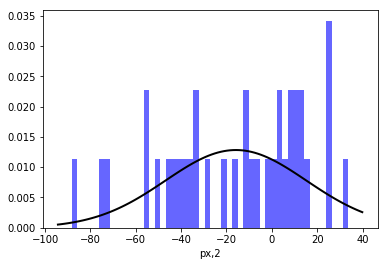

(-15.840432977566612, 31.107610371697131)


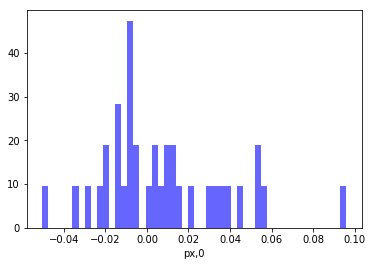

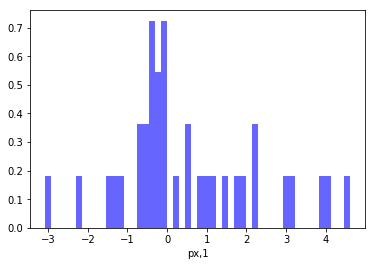

In [3]:
# Fit a normal distribution to the data of the p2 in the x-axis:
mu, std = stats.norm.fit(P1['Px2'])
plt.hist(P1['Px2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('px,2')
plt.show()
print(mu,std)
plt.hist(P1['Px0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('px,0');
plt.show()
plt.hist(P1['Px1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('px,1');
plt.show()

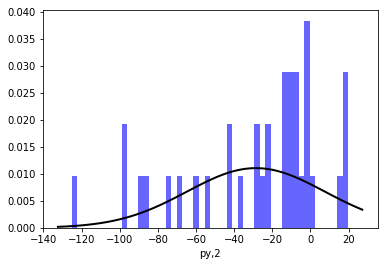

(-28.605257578403396, 36.145908904002155)


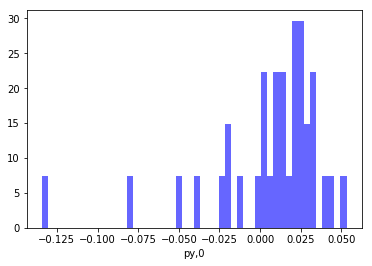

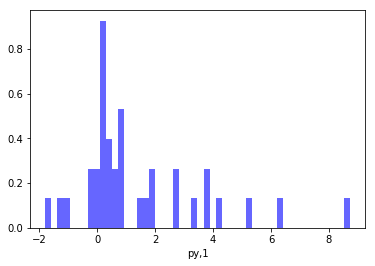

In [4]:
# Fit a normal distribution to the data of the p2 in the y-axis:
mu, std = stats.norm.fit(P1['Py2'])
plt.hist(P1['Py2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('py,2')
plt.show()
print(mu,std)
plt.hist(P1['Py0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,0');
plt.show()
plt.hist(P1['Py1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,1');
plt.show()

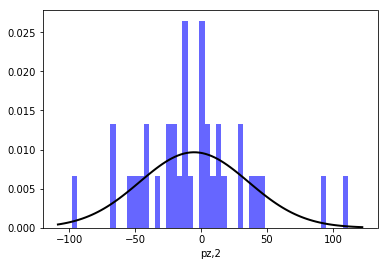

(-5.2972396265779889, 41.317919902490104)


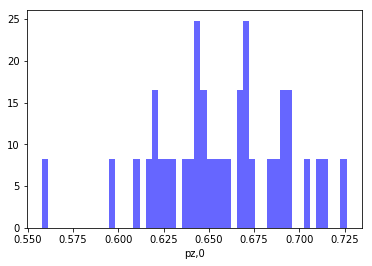

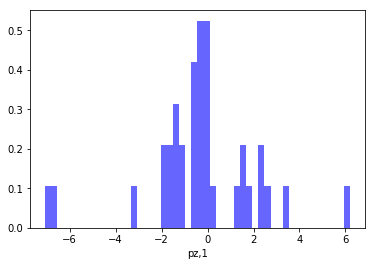

In [5]:
# Fit a normal distribution to the data of the p2 in the z-axis:
mu, std = stats.norm.fit(P1['Pz2'])
plt.hist(P1['Pz2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('pz,2')
plt.show()
print(mu,std)
plt.hist(P1['Pz0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,0');
plt.show()
plt.hist(P1['Pz1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,1');
plt.show()